<a href="https://colab.research.google.com/github/MB2407/A-to-Z-Resources-for-Students/blob/master/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import io

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ASIAN-PAINTS.csv to ASIAN-PAINTS.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['ASIAN-PAINTS.csv']))
df.rename(columns={'Date': 'date', 'Open Price': 'open', 'High Price': 'high', 'Low Price': 'low', 'Close Price': 'close', 'WAP': 'wap', 'No.of Shares' : 'shares', 'No. of Trades' : 'trades', 'Total Turnover (Rs.)' : 'turnover', 'Deliverable Quantity' : 'deliQty', '% Deli. Qty to Traded Qty' : 'deliQtyToTradedQty', 'Spread High-Low' : 'highLowSpread', 'Spread Close-Open' : 'closeOpenSpread'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1976 non-null   object 
 1   open                1976 non-null   float64
 2   high                1976 non-null   float64
 3   low                 1976 non-null   float64
 4   close               1976 non-null   float64
 5   wap                 1976 non-null   float64
 6   shares              1976 non-null   int64  
 7   trades              1976 non-null   int64  
 8   turnover            1976 non-null   float64
 9   deliQty             1974 non-null   float64
 10  deliQtyToTradedQty  1974 non-null   float64
 11  highLowSpread       1976 non-null   float64
 12  closeOpenSpread     1976 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 200.8+ KB


In [ ]:
df.head()

,date,open,high,low,close,wap,shares,trades,turnover,deliQty,deliQtyToTradedQty,highLowSpread,closeOpenSpread
0,8-April-2022,3172.85,3219.00,3150.70,3206.70,3190.305220,63125,8976,201388017.0,34502.0,54.66,68.30,33.85
1,7-April-2022,3145.40,3208.95,3145.40,3155.30,3174.126443,113031,10464,358774686.0,55258.0,48.89,63.55,9.90
2,6-April-2022,3139.60,3165.00,3112.55,3155.05,3144.289330,47496,4958,149341166.0,25788.0,54.30,52.45,15.45
3,5-April-2022,3116.00,3157.25,3080.80,3139.60,3140.860434,48658,3918,152827987.0,29864.0,61.38,76.45,23.60
4,4-April-2022,3147.00,3147.00,3092.60,3117.65,3118.713192,60368,10156,188270478.0,34489.0,57.13,54.40,-29.35


In [ ]:
df.describe()

,open,high,low,close,wap,shares,trades,turnover,deliQty,deliQtyToTradedQty,highLowSpread,closeOpenSpread
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1.976000e+03,1976.000000,1.976000e+03,1.974000e+03,1974.000000,1976.000000,1976.000000
mean,1481.883806,1498.359211,1462.986361,1480.261032,1480.192215,1.017347e+05,4260.523279,1.464613e+08,4.323471e+04,35.389732,35.372849,-1.622773
std,761.744792,770.282498,752.338117,761.554625,760.818664,1.419901e+05,4001.710850,2.778673e+08,9.477701e+04,16.837245,28.550545,27.479013
min,501.000000,504.800000,495.150000,498.300000,501.608560,6.091000e+03,340.000000,7.600542e+06,2.307000e+03,0.600000,4.350000,-186.450000
25%,886.937500,896.937500,877.500000,887.237500,886.595354,4.347275e+04,1974.500000,5.567626e+07,1.186750e+04,23.680000,17.837500,-13.650000
50%,1205.500000,1219.375000,1188.500000,1202.625000,1204.352070,6.896750e+04,3126.000000,8.690495e+07,2.009700e+04,31.200000,26.050000,-1.725000
75%,1781.250000,1800.000000,1757.362500,1778.337500,1779.260632,1.104602e+05,5116.250000,1.503766e+08,3.874425e+04,42.682500,43.475000,8.837500
max,3580.000000,3588.050000,3534.000000,3574.650000,3556.794739,3.597728e+06,52064.000000,6.694289e+09,1.606401e+06,97.980000,275.400000,167.200000


In [ ]:
df

,date,open,high,low,close,wap,shares,trades,turnover,deliQty,deliQtyToTradedQty,highLowSpread,closeOpenSpread
0,8-April-2022,3172.85,3219.00,3150.70,3206.70,3190.305220,63125,8976,201388017.0,34502.0,54.66,68.30,33.85
1,7-April-2022,3145.40,3208.95,3145.40,3155.30,3174.126443,113031,10464,358774686.0,55258.0,48.89,63.55,9.90
2,6-April-2022,3139.60,3165.00,3112.55,3155.05,3144.289330,47496,4958,149341166.0,25788.0,54.30,52.45,15.45
3,5-April-2022,3116.00,3157.25,3080.80,3139.60,3140.860434,48658,3918,152827987.0,29864.0,61.38,76.45,23.60
4,4-April-2022,3147.00,3147.00,3092.60,3117.65,3118.713192,60368,10156,188270478.0,34489.0,57.13,54.40,-29.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,17-April-2014,535.00,545.45,533.85,543.60,540.104629,50961,2854,27524272.0,14116.0,27.70,11.60,8.60
1972,16-April-2014,535.90,538.50,533.00,534.55,535.380639,32653,1832,17481784.0,5925.0,18.15,5.50,-1.35
1973,15-April-2014,543.75,544.00,531.10,534.80,535.949555,39370,1988,21100334.0,9900.0,25.15,12.90,-8.95
1974,11-April-2014,540.10,544.95,536.00,541.95,541.192761,48599,2619,26301427.0,13314.0,27.40,8.95,1.85


In [ ]:
df = df[::-1]
df = df['close'].values
df = df.reshape(-1, 1)

In [ ]:
print(df.shape)

(1976, 1)


In [ ]:
df

array([[ 541.3 ],
       [ 541.95],
       [ 534.8 ],
       ...,
       [3155.05],
       [3155.3 ],
       [3206.7 ]])

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(1580, 1)
(446, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.02861516],
       [0.02904771],
       [0.02428961],
       [0.02412324],
       [0.03014574]])

In [ ]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.79433686],
       [0.7912757 ],
       [0.79177481],
       [0.79084315],
       [0.79709856]])

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.02861516, 0.02904771, 0.02428961, 0.02412324, 0.03014574,
        0.02751714, 0.02532109, 0.02082917, 0.01111333, 0.00179677,
        0.        , 0.00455846, 0.0075198 , 0.01344247, 0.01094696,
        0.00535702, 0.00379317, 0.01493978, 0.02528782, 0.02721767,
        0.03902975, 0.02089572, 0.02535436, 0.01996406, 0.02046317,
        0.03117721, 0.0261862 , 0.02698476, 0.01743528, 0.0159047 ,
        0.00918347, 0.00562321, 0.00741998, 0.00771944, 0.00732016,
        0.00718706, 0.00828509, 0.00535702, 0.02003061, 0.02485526,
        0.02898117, 0.03300725, 0.02804951, 0.02751714, 0.04085979,
        0.0384641 , 0.04611699, 0.04548479, 0.04944433, 0.0533706 ]])

In [ ]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.79433686, 0.7912757 , 0.79177481, 0.79084315, 0.79709856,
        0.80525055, 0.82993944, 0.7907766 , 0.81087376, 0.80172356,
        0.80345378, 0.79200772, 0.78059493, 0.79480269, 0.81163905,
        0.83426499, 0.81539895, 0.79799694, 0.81792773, 0.80698077,
        0.85143409, 0.83935583, 0.82461569, 0.82837559, 0.81077394,
        0.80298796, 0.80921009, 0.81110667, 0.81849338, 0.86960138,
        0.85456179, 0.85928662, 0.86407799, 0.86767152, 0.86730552,
        0.89009782, 0.91521927, 0.92327144, 0.9163173 , 0.97161775,
        0.97487855, 1.        , 0.98006921, 0.98735609, 0.9711852 ,
        0.93505024, 0.98482731, 0.96339921, 0.98499368, 0.9700539 ]])

In [ ]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

Epoch 1/50
48/48 [==============================] - 17s 173ms/step - loss: 0.0293
Epoch 2/50
48/48 [==============================] - 9s 195ms/step - loss: 0.0038
Epoch 3/50
48/48 [==============================] - 8s 173ms/step - loss: 0.0037
Epoch 4/50
48/48 [==============================] - 8s 173ms/step - loss: 0.0027
Epoch 5/50
48/48 [==============================] - 8s 173ms/step - loss: 0.0034
Epoch 6/50
48/48 [==============================] - 8s 174ms/step - loss: 0.0030
Epoch 7/50
48/48 [==============================] - 8s 175ms/step - loss: 0.0029
Epoch 8/50
48/48 [==============================] - 8s 173ms/step - loss: 0.0028
Epoch 9/50
48/48 [==============================] - 15s 311ms/step - loss: 0.0025
Epoch 10/50
48/48 [==============================] - 13s 265ms/step - loss: 0.0024
Epoch 11/50
48/48 [==============================] - 8s 174ms/step - loss: 0.0027
Epoch 12/50
48/48 [==============================] - 8s 172ms/step - loss: 0.0024
Epoch 13/50
48/48 [===

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [ ]:
model = load_model('stock_prediction.h5')

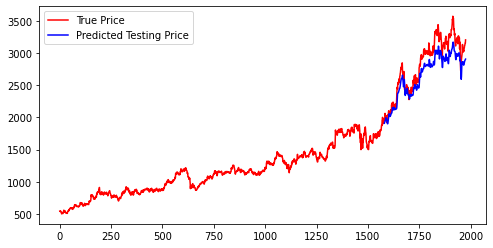

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

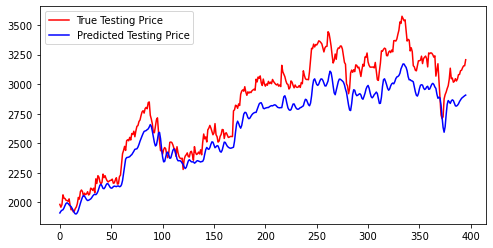

In [ ]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [ ]:
x = x_test[-1]
num_timesteps = 100
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[2907.2805, 4748.4814, 4947.214, 5056.102, 5087.272, 5106.612, 5116.791, 5123.31, 5127.428, 5130.101, 5131.809, 5132.8696, 5133.486, 5133.7954, 5133.898, 5133.8545, 5133.7163, 5133.5166, 5133.2793, 5133.0215, 5132.7573, 5132.497, 5132.244, 5132.01, 5131.7905, 5131.5913, 5131.4097, 5131.249, 5131.1123, 5131.005, 5130.941, 5130.912, 5130.915, 5130.9385, 5130.988, 5131.0835, 5131.2583, 5131.513, 5131.831, 5132.137, 5132.337, 5132.37, 5132.25, 5132.0615, 5131.8643, 5131.521, 5130.614, 5128.599, 5125.0073, 5119.5293, 5111.9873, 5111.9863, 5111.987, 5111.987, 5111.9863, 5111.9863, 5111.9863, 5111.9863, 5111.9863, 5111.986, 5111.986, 5111.9863, 5111.986, 5111.985, 5111.986, 5111.985, 5111.985, 5111.9854, 5111.985, 5111.985, 5111.985, 5111.985, 5111.985, 5111.985, 5111.985, 5111.985, 5111.9844, 5111.9844, 5111.9844, 5111.984, 5111.984, 5111.984, 5111.984, 5111.984, 5111.984, 5111.984, 5111.9844, 5111.984, 5111.9844, 5111.9844, 5111.9844, 5111.9844, 5111.9844, 5111.9844, 5111.9844, 5111.9844, 5

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test_scaled, predictions))
print('Mean Squared Error:', mean_squared_error(y_test_scaled, predictions))    
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_scaled, predictions)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_scaled, predictions))

Mean Absolute Error: 148.614652134
Mean Squared Error: 5147.01516732
Root Mean Squared Error: 74.7413455
Mean Absolute Percentage Error: 0.021056457553973125


|Performance Metrics|Accuracy|
|-----|-----|
|Mean Squared Error|5147|
|Root Mean Squared Error (RMSE):| 74.74|
|Mean Absolute Percentage Error (MAPE):| 0.0210|
|Mean Absolute Error :| 148.6|
|R2 Score :| 0.935|

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test_scaled, predictions))

0.9401964995950439

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test_scaled, predictions)

0.7737900907083645
